In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Concatenate
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [14]:
!unzip -nq UCI-HAR.zip

In [15]:
!ls

 __MACOSX   sample_data  'UCI HAR Dataset'   UCI-HAR.zip


In [16]:
!ls 'UCI HAR Dataset'

activity_labels.txt  features_info.txt	features.txt  README.txt  test	train


In [17]:
!ls 'UCI HAR Dataset/train'

'Inertial Signals'   subject_train.txt	 X_train.txt   y_train.txt


In [18]:
!head 'UCI HAR Dataset/train/X_train.txt'

  2.8858451e-001 -2.0294171e-002 -1.3290514e-001 -9.9527860e-001 -9.8311061e-001 -9.1352645e-001 -9.9511208e-001 -9.8318457e-001 -9.2352702e-001 -9.3472378e-001 -5.6737807e-001 -7.4441253e-001  8.5294738e-001  6.8584458e-001  8.1426278e-001 -9.6552279e-001 -9.9994465e-001 -9.9986303e-001 -9.9461218e-001 -9.9423081e-001 -9.8761392e-001 -9.4321999e-001 -4.0774707e-001 -6.7933751e-001 -6.0212187e-001  9.2929351e-001 -8.5301114e-001  3.5990976e-001 -5.8526382e-002  2.5689154e-001 -2.2484763e-001  2.6410572e-001 -9.5245630e-002  2.7885143e-001 -4.6508457e-001  4.9193596e-001 -1.9088356e-001  3.7631389e-001  4.3512919e-001  6.6079033e-001  9.6339614e-001 -1.4083968e-001  1.1537494e-001 -9.8524969e-001 -9.8170843e-001 -8.7762497e-001 -9.8500137e-001 -9.8441622e-001 -8.9467735e-001  8.9205451e-001 -1.6126549e-001  1.2465977e-001  9.7743631e-001 -1.2321341e-001  5.6482734e-002 -3.7542596e-001  8.9946864e-001 -9.7090521e-001 -9.7551037e-001 -9.8432539e-001 -9.8884915e-001 -9.1774264e-001 -1.0000

In [19]:
!head 'UCI HAR Dataset/train/y_train.txt'

5
5
5
5
5
5
5
5
5
5


In [20]:
!ls 'UCI HAR Dataset/train/Inertial Signals'

body_acc_x_train.txt  body_gyro_x_train.txt  total_acc_x_train.txt
body_acc_y_train.txt  body_gyro_y_train.txt  total_acc_y_train.txt
body_acc_z_train.txt  body_gyro_z_train.txt  total_acc_z_train.txt


In [21]:
!head 'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt'

  1.8085150e-004  1.0138560e-002  9.2755740e-003  5.0658970e-003  1.0810250e-002  4.0451010e-003  4.7573750e-003  6.2136470e-003  3.3067440e-003  7.5719410e-003  5.4071170e-003  6.2212760e-003  6.8950280e-003  4.6102600e-003  7.3313330e-003  5.0776670e-003  5.7625560e-003  6.6927480e-003  5.4432380e-003  8.2409520e-003  6.5064510e-003  6.5315230e-003  7.4224410e-003  5.7717690e-003  6.2401870e-003  4.6229820e-003  4.8329620e-003  5.4987460e-003  4.3411860e-003  5.0980180e-003  4.2687420e-003  3.0451870e-003  3.2041920e-003  4.5204000e-003  5.1272110e-003  3.5497910e-003  4.2342330e-003  4.4686700e-003  3.5727020e-003  5.1362780e-003  5.3797860e-003  4.4085200e-003  2.2440390e-003 -1.1835980e-003 -6.7953420e-004  2.2813890e-003  3.6537280e-003  2.3126390e-003 -4.0421940e-005  5.3422540e-004  2.9632630e-003  4.3994680e-003  2.7023390e-003  3.4523100e-004  2.9169110e-003  4.9785560e-003  3.4468700e-003  4.3781510e-003  5.0061700e-003  1.9967950e-003 -4.7185960e-004 -7.5556790e-004 -1.5281

In [22]:
df = pd.read_csv(
    'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',
    header=None,
    delim_whitespace=True,
)

In [23]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB


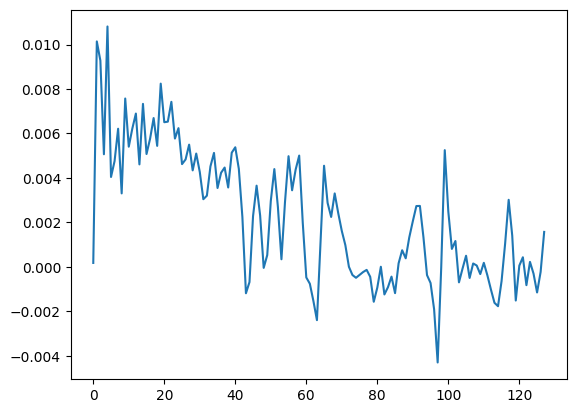

In [25]:
df.iloc[0].plot();

### Loading Format

In [26]:
# Obtain these by inspecting the files
T = 128
Ntrain = 7352
Ntest = 2947
D = 9 # since there are 9 files
K = 6 # number of classes (1-6)

In [27]:
def load_data():
  # Returns:
  # Xtrain (Ntrain x T x D), Ytrain (Ntrain)
  # Xtest (Ntest x T x D), Ytest (Ntest)

  Xtrain = np.zeros((Ntrain, T, D))
  Xtest = np.zeros((Ntest, T, D))

  # train data
  ts_filenames = [
    'body_acc_x_train.txt', 'body_gyro_x_train.txt', 'total_acc_x_train.txt',
    'body_acc_y_train.txt', 'body_gyro_y_train.txt', 'total_acc_y_train.txt',
    'body_acc_z_train.txt', 'body_gyro_z_train.txt', 'total_acc_z_train.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/train/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header=None,
        delim_whitespace=True)

    # Ntrain x T array
    x = df.to_numpy()
    Xtrain[:, :, d] = x

  # train labels
  Ytrain = pd.read_csv(
      f'{ts_file_prefix}y_train.txt', header=None).to_numpy() - 1
  Ytrain = Ytrain.flatten()

  # test data
  ts_filenames = [
    'body_acc_x_test.txt', 'body_gyro_x_test.txt', 'total_acc_x_test.txt',
    'body_acc_y_test.txt', 'body_gyro_y_test.txt', 'total_acc_y_test.txt',
    'body_acc_z_test.txt', 'body_gyro_z_test.txt', 'total_acc_z_test.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/test/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header=None,
        delim_whitespace=True)

    # Ntrain x T array
    x = df.to_numpy()
    Xtest[:, :, d] = x

  # test labels
  Ytest = pd.read_csv(
      f'{ts_file_prefix}y_test.txt', header=None).to_numpy() - 1
  Ytest = Ytest.flatten()

  return Xtrain, Ytrain, Xtest, Ytest

In [28]:
Xtrain, Ytrain, Xtest, Ytest = load_data()

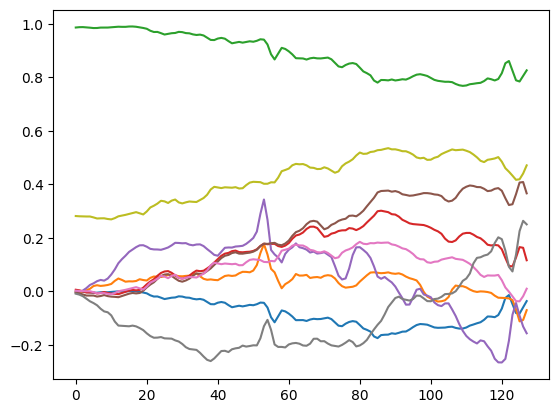

In [29]:
# plot all D=9 time series of length T=128
plt.plot(Xtrain[7000, :, :]);

In [30]:
# ANN
inputs = []
features = []

# make a neural network for each of the D time series
for d in range(D):
  i = Input(shape=(T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)

# output of concatenate will be D * (size of individual ANN output)
x = Concatenate()(features)
x = Dense(K)(x)
model = Model(inputs, x)

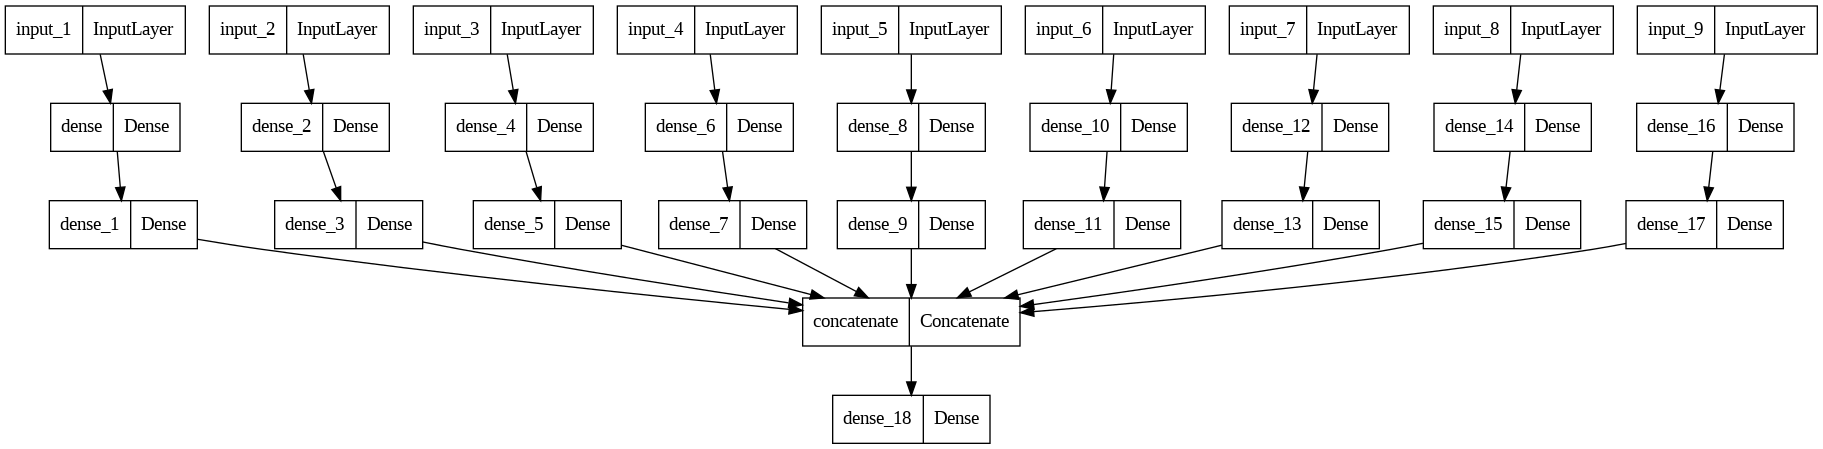

In [31]:
tf.keras.utils.plot_model(model)

In [32]:
check_point = ModelCheckpoint(
    'best_model.h5', monitor='val_accuracy', save_best_only=True)

In [33]:
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'],
)

In [34]:
Xtrain_split = []
Xtest_split = []
for d in range(D):
  Xtrain_split.append(Xtrain[:, :, d])
  Xtest_split.append(Xtest[:, :, d])

In [35]:
r = model.fit(
  Xtrain_split,
  Ytrain,
  epochs=15,
  callbacks=[check_point],
  validation_data=(Xtest_split, Ytest),
)

Epoch 1/15
230/230 [==============================] - 7s 9ms/step - loss: 0.6574 - accuracy: 0.7722 - val_loss: 0.4384 - val_accuracy: 0.8470
Epoch 2/15
 12/230 [>.............................] - ETA: 1s - loss: 0.2547 - accuracy: 0.9323

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


230/230 [==============================] - 1s 6ms/step - loss: 0.2309 - accuracy: 0.9202 - val_loss: 0.3659 - val_accuracy: 0.8694
Epoch 3/15
230/230 [==============================] - 2s 7ms/step - loss: 0.1755 - accuracy: 0.9353 - val_loss: 0.3246 - val_accuracy: 0.8772
Epoch 4/15
230/230 [==============================] - 1s 6ms/step - loss: 0.1418 - accuracy: 0.9487 - val_loss: 0.2929 - val_accuracy: 0.8924
Epoch 5/15
230/230 [==============================] - 2s 10ms/step - loss: 0.1219 - accuracy: 0.9574 - val_loss: 0.2740 - val_accuracy: 0.8955
Epoch 6/15
230/230 [==============================] - 2s 7ms/step - loss: 0.1103 - accuracy: 0.9615 - val_loss: 0.2539 - val_accuracy: 0.8992
Epoch 7/15
230/230 [==============================] - 2s 7ms/step - loss: 0.1017 - accuracy: 0.9633 - val_loss: 0.2509 - val_accuracy: 0.9023
Epoch 8/15
230/230 [==============================] - 1s 6ms/step - loss: 0.0969 - accuracy: 0.9660 - val_loss: 0.2457 - val_accuracy: 0.9101
Epoch 9/15
230/2

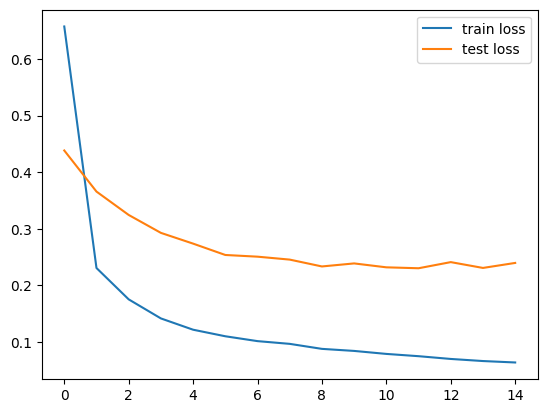

In [36]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

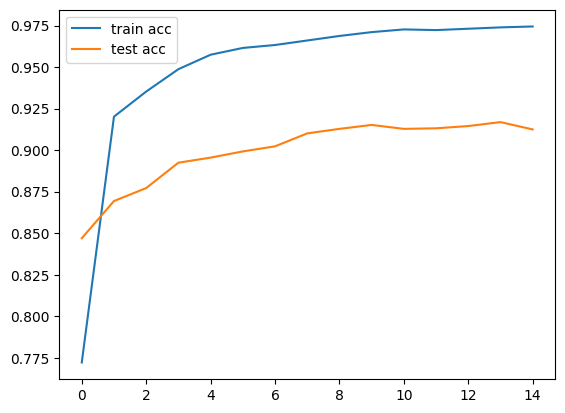

In [37]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [38]:
# load best model
best_model = tf.keras.models.load_model('best_model.h5')

In [39]:
# make predictions
Ptest = best_model.predict(Xtest_split)

93/93 [==============================] - 1s 3ms/step


In [40]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9168646080760094

In [41]:
from sklearn.preprocessing import StandardScaler

def load_features():
  # Returns:
  # X_train (Ntrain x D)
  # X_test (Ntest x D)

  # train data
  df = pd.read_csv(
        'UCI HAR Dataset/train/X_train.txt',
        header=None,
        delim_whitespace=True)

  feat_train = df.to_numpy()

  # test data
  df = pd.read_csv(
        'UCI HAR Dataset/test/X_test.txt',
        header=None,
        delim_whitespace=True)

  feat_test = df.to_numpy()

  scaler = StandardScaler()
  feat_train = scaler.fit_transform(feat_train)
  feat_test = scaler.transform(feat_test)

  return feat_train, feat_test

In [42]:
feat_train, feat_test = load_features()

In [43]:
D_feat = feat_train.shape[1]

In [44]:
# Basic ANN
i = Input(shape=(D_feat,))
x = Dense(32, activation='relu')(i)
x = Dense(K)(x)
model = Model(i, x)

In [45]:
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'],
)

In [46]:
check_point2 = ModelCheckpoint(
    'best_model_basic.h5', monitor='val_accuracy', save_best_only=True)


In [47]:
r = model.fit(
  feat_train,
  Ytrain,
  epochs=15,
  callbacks=[check_point2],
  validation_data=(feat_test, Ytest),
)

Epoch 1/15
230/230 [==============================] - 3s 8ms/step - loss: 0.3462 - accuracy: 0.8764 - val_loss: 0.1852 - val_accuracy: 0.9345
Epoch 2/15
 71/230 [========>.....................] - ETA: 0s - loss: 0.1183 - accuracy: 0.9661

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


230/230 [==============================] - 1s 3ms/step - loss: 0.1043 - accuracy: 0.9659 - val_loss: 0.1695 - val_accuracy: 0.9389
Epoch 3/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0723 - accuracy: 0.9763 - val_loss: 0.2005 - val_accuracy: 0.9209
Epoch 4/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0610 - accuracy: 0.9778 - val_loss: 0.1665 - val_accuracy: 0.9359
Epoch 5/15
230/230 [==============================] - 1s 4ms/step - loss: 0.0562 - accuracy: 0.9799 - val_loss: 0.1697 - val_accuracy: 0.9348
Epoch 6/15
230/230 [==============================] - 1s 5ms/step - loss: 0.0453 - accuracy: 0.9849 - val_loss: 0.1617 - val_accuracy: 0.9389
Epoch 7/15
230/230 [==============================] - 1s 5ms/step - loss: 0.0449 - accuracy: 0.9839 - val_loss: 0.1798 - val_accuracy: 0.9362
Epoch 8/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0363 - accuracy: 0.9869 - val_loss: 0.1501 - val_accuracy: 0.9460
Epoch 9/15
230/23

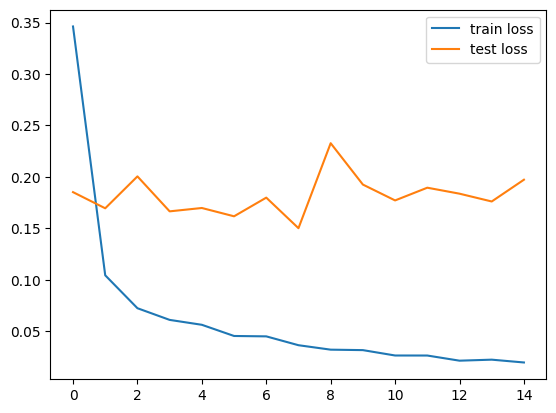

In [48]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

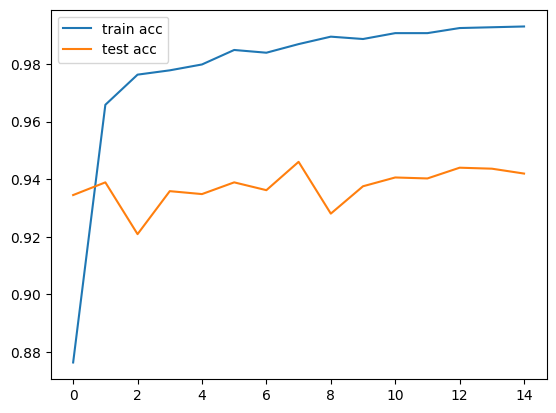

In [49]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend()

In [50]:
# load best model
best_model = tf.keras.models.load_model('best_model_basic.h5')

In [51]:
# make predictions
Ptest = best_model.predict(feat_test)

93/93 [==============================] - 0s 2ms/step


In [52]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9460468272819816

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = LogisticRegression(
    solver='liblinear',
)
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9945593035908596

In [55]:
model.score(feat_test, Ytest)

0.9613165931455717

In [56]:
model = SVC()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9866702937976061

In [57]:
model.score(feat_test, Ytest)

0.9521547336274178

In [58]:
# model = SVC(kernel='linear')
model = LinearSVC()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9975516866158868

In [59]:
model.score(feat_test, Ytest)

0.9643705463182898

In [60]:
model = RandomForestClassifier()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

1.0

In [61]:
model.score(feat_test, Ytest)

0.9243298269426535

In [62]:
# Combined Model
inputs = []
features = []

# make a neural network for each of the D time series
for d in range(D):
  i = Input(shape=(T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)

i2 = Input(shape=(D_feat,))
x2 = Dense(32, activation='relu')(i2)

# output of concatenate will be D * (size of individual ANN output)
x = Concatenate()(features + [x2])
x = Dense(K)(x)
model = Model(inputs + [i2], x)

In [63]:
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'],
)

In [64]:
check_point3 = ModelCheckpoint(
    'best_model_combined.h5', monitor='val_accuracy', save_best_only=True)

In [65]:
r = model.fit(
  Xtrain_split + [feat_train],
  Ytrain,
  epochs=15,
  callbacks=[check_point3],
  validation_data=(Xtest_split + [feat_test], Ytest),
)

Epoch 1/15
230/230 [==============================] - 6s 11ms/step - loss: 0.3111 - accuracy: 0.8891 - val_loss: 0.2341 - val_accuracy: 0.9152
Epoch 2/15
  1/230 [..............................] - ETA: 2s - loss: 0.1628 - accuracy: 0.9062

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


230/230 [==============================] - 2s 7ms/step - loss: 0.0960 - accuracy: 0.9680 - val_loss: 0.1714 - val_accuracy: 0.9379
Epoch 3/15
230/230 [==============================] - 1s 6ms/step - loss: 0.0670 - accuracy: 0.9769 - val_loss: 0.1867 - val_accuracy: 0.9328
Epoch 4/15
230/230 [==============================] - 1s 6ms/step - loss: 0.0587 - accuracy: 0.9784 - val_loss: 0.1685 - val_accuracy: 0.9406
Epoch 5/15
230/230 [==============================] - 2s 7ms/step - loss: 0.0496 - accuracy: 0.9819 - val_loss: 0.1441 - val_accuracy: 0.9474
Epoch 6/15
230/230 [==============================] - 2s 7ms/step - loss: 0.0461 - accuracy: 0.9825 - val_loss: 0.1512 - val_accuracy: 0.9522
Epoch 7/15
230/230 [==============================] - 2s 7ms/step - loss: 0.0425 - accuracy: 0.9831 - val_loss: 0.1751 - val_accuracy: 0.9494
Epoch 8/15
230/230 [==============================] - 2s 9ms/step - loss: 0.0346 - accuracy: 0.9880 - val_loss: 0.1399 - val_accuracy: 0.9559
Epoch 9/15
230/23

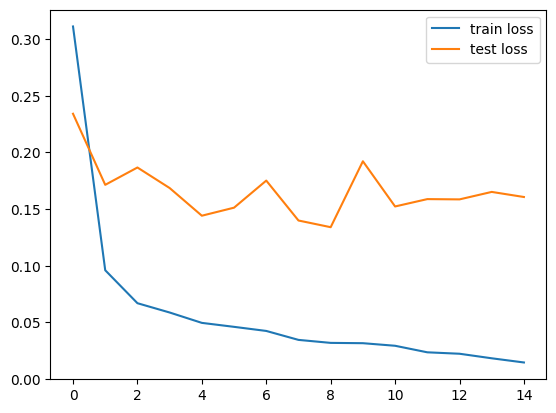

In [66]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

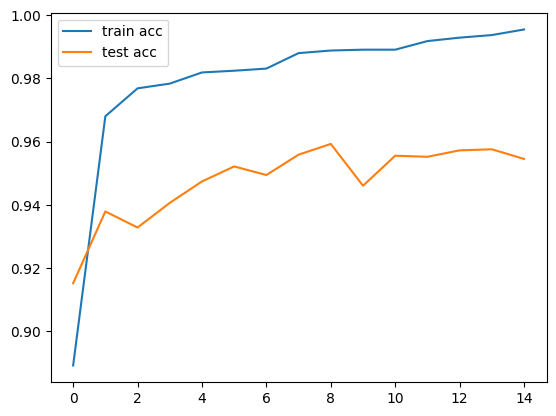

In [67]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [68]:
# load best model
best_model = tf.keras.models.load_model('best_model_combined.h5')

In [69]:
# make predictions
Ptest = best_model.predict(Xtest_split + [feat_test])

93/93 [==============================] - 0s 2ms/step


In [70]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9592806243637597